## Análisis de componentes principales (PCA)

El análisis de componente principal es un método que rota el conjunto de datos de forma tal que las características giradas no están correlacionadas estadísticamente. A esta rotación a menudo le sigue seleccionar solo un subconjunto de las nuevas características, según la importancia que tengan para explicar los datos.

In [1]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

from sklearn.externals.joblib import Memory

memory = Memory(cachedir="cache")


def dibuja_pca():
    rnd = np.random.RandomState(5)
    X_ = rnd.normal(size=(300, 2))
    X_s = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

    pca = PCA()
    pca.fit(X_s)
    X_pca = pca.transform(X_s)

    S = X_pca.std(axis=0)

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.ravel()

    axes[0].set_title("Datos originales")
    axes[0].scatter(X_s[:, 0], X_s[:, 1], c=X_pca[:, 0], linewidths=0, s=60, cmap='viridis')
    axes[0].set_xlabel("caracteristica 1")
    axes[0].set_ylabel("caracteristica 2")
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
                  S[0] * pca.components_[0, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
                  S[1] * pca.components_[1, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].text(-1.5, -.5, "Componente 2", size=14)
    axes[0].text(-4, -4, "Componente 1", size=14)
    axes[0].set_aspect('equal')

    axes[1].set_title("Datos transformados")
    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[1].set_xlabel("Primer componente principal")
    axes[1].set_ylabel("Segundo componente principal")
    axes[1].set_aspect('equal')
    axes[1].set_ylim(-8, 8)

    pca = PCA(n_components=1)
    pca.fit(X_s)
    X_inversa = pca.inverse_transform(pca.transform(X_s))

    axes[2].set_title("Transformacion de datos en un solo eje componente")
    axes[2].scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes[2].set_xlabel("Primer componente principal")
    axes[2].set_aspect('equal')
    axes[2].set_ylim(-8, 8)

    axes[3].set_title("Rotacion utilizando solo el primer componente")
    axes[3].scatter(X_inversa[:, 0], X_inversa[:, 1], c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes[3].set_xlabel("caracteristica 1")
    axes[3].set_ylabel("caracteristica 2")
    axes[3].set_aspect('equal')
    axes[3].set_xlim(-8, 4)
    axes[3].set_ylim(-8, 4)

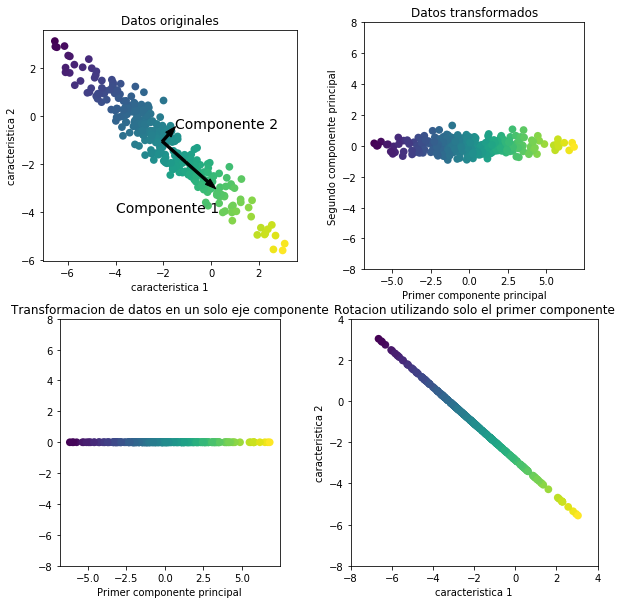

In [2]:
dibuja_pca()

El primer  gráfico (arriba a la izquierda) muestra los puntos de datos originales, coloreados para distinguirlos. El algoritmo procede encontrando primero la dirección de máxima varianza, etiquetada como `Componente 1`. Esta es la dirección (o vector) en los datos que contiene la mayor parte de la información, o en otras palabras, la dirección a lo largo de la cual las características están más correlacionadas una de otras. Luego, el algoritmo encuentra la dirección que contiene la mayor información mientras es ortogonal (en ángulo recto) a la primera dirección. En dos dimensiones, solo hay una orientación posible que está en un ángulo recto, pero en espacios de dimensiones superiores habría (infinitamente) muchas direcciones ortogonales.

Aunque los dos componentes se dibujan como flechas, en realidad no importa dónde están la parte inicial  y final; podríamos haber dibujado el primer componente desde el centro hacia arriba a la izquierda en lugar de hacia abajo a la derecha. Las direcciones encontradas usando este proceso se llaman componentes principales, ya que son las direcciones principales de varianza en los datos. En general, hay tantos componentes principales como características originales.



El segundo gráfico (arriba a la derecha) muestra los mismos datos, pero ahora gira de manera que el primer componente principal se alinea con el eje x y el segundo componente principal se alinea con el eje y. Antes de la rotación, la media se resta de los datos, de modo que los datos transformados se centran en cero. En la representación rotatoria encontrada por PCA, los dos ejes no están correlacionados, lo que significa que la matriz de correlación de los datos en esta representación es cero excepto por la diagonal.

Podemos usar PCA para la reducción de dimensionalidad reteniendo solo algunos de los componentes principales. En este ejemplo, podríamos conservar solo el primer componente principal, como se muestra en el tercer panel  de la figura anterior(abajo a la izquierda). Esto reduce los datos de un conjunto de datos bidimensional a un conjunto de datos unidimensional. Sin embargo, en lugar de conservar solo una de las características originales, encontramos la dirección más interesante (arriba a la izquierda, abajo a la derecha en el primer panel) y mantuvimos esta dirección, el primer componente principal.

Finalmente, podemos deshacer la rotación y agregar la media a los datos. Esto dará como resultado los datos que se muestran en el último panel en la figura anterior. Estos puntos se encuentran en el espacio de características original, pero solo conservamos la información contenida en el primer componente principal. Esta transformación a veces se usa para eliminar los efectos de ruido de los datos o para visualizar qué parte de la información se conserva utilizando los componentes principales.

### Aplicando PCA  a un conjunto de datos para realizar visualización

Una de las aplicaciones más comunes de PCA es visualizar conjuntos de datos de gran dimensión. Es difícil crear gráficos de dispersión que tengan más de dos características. Si queremos ver el conjunto de datos `Breast Cancer`, incluso el uso de dibujo de pares es complicado. Este conjunto de datos tiene `30` características, ¡lo que daría como resultado `30 * 14 = 420` gráficos de dispersión! No se podría ver todas todos los gráficos en detalle y mucho menos intentar comprenderlos.

Hay una visualización aún más simple que podemos usar, calcular histogramas de cada una de las características de las dos clases, cáncer benigno y maligno.

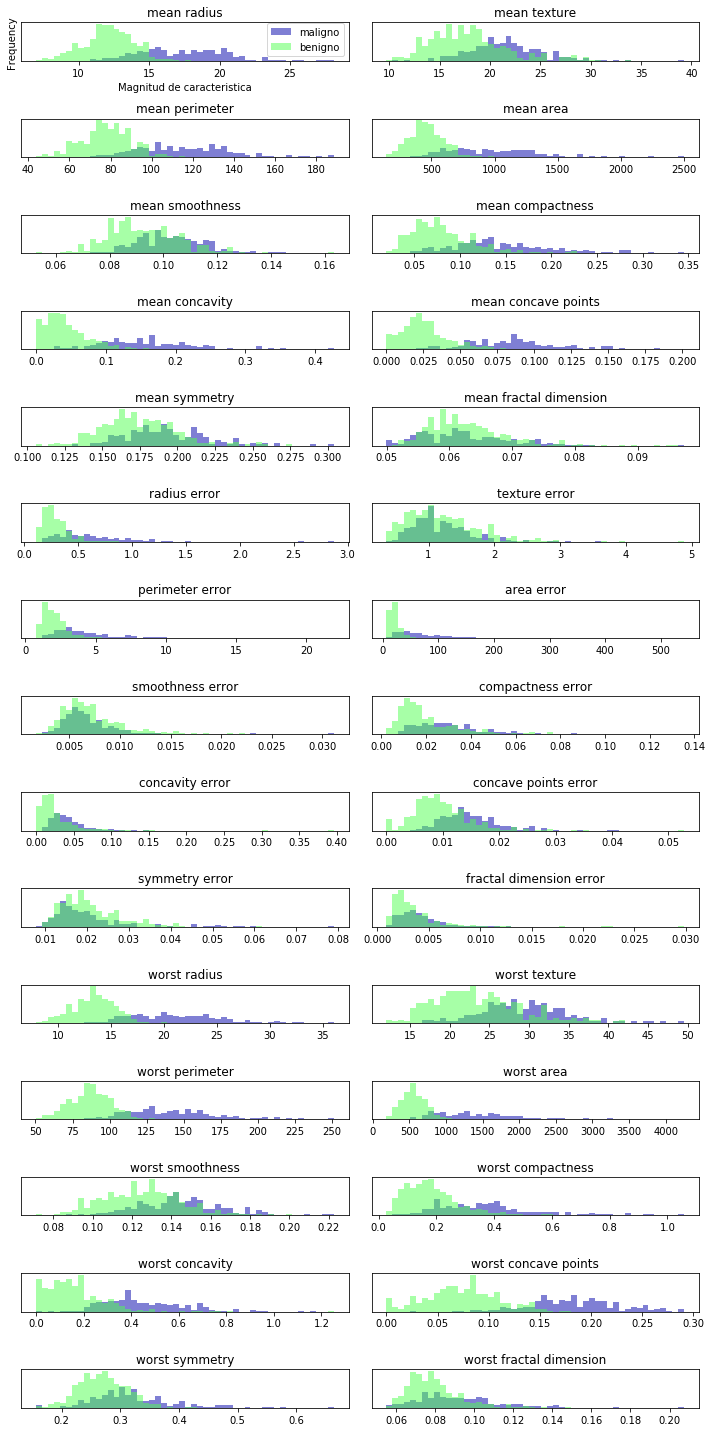

In [3]:
from matplotlib.colors import ListedColormap
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
maligno = cancer.data[cancer.target == 0]
benigno = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _,bins  = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(maligno[:, i], bins=bins, color=cm3(0), alpha=.5)
    ax[i].hist(benigno[:, i], bins=bins, color=cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("Magnitud de caracteristica")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["maligno", "benigno"], loc="best")
    fig.tight_layout()

Aquí creamos un histograma para cada una de las características, contando la frecuencia con la que aparece un punto de datos con una característica en un cierto rango (llamado `bin`). Cada diagrama superpone dos histogramas, uno para todos los puntos en la clase benigna (azul) y uno para todos los puntos en la clase maligna (rojo). Esto nos da una idea de cómo cada característica se distribuye entre las dos clases y nos permite aventurarnos a adivinar qué características son mejores para distinguir muestras malignas y benignas. Por ejemplo, la característica `smoothness error` parece poco informativa, porque los dos histogramas se superponen sobre todo, mientras que la característica `worst concave points` parece bastante informativa, porque los histogramas son bastante disjuntos.

Sin embargo, este gráfico no nos muestra nada sobre las interacciones entre variables y cómo estas se relacionan con las clases. Usando PCA, podemos capturar las interacciones principales y obtener una imagen un poco más completa. Podemos encontrar los dos primeros componentes principales y visualizar los datos en este nuevo espacio bidimensional con un solo diagrama de dispersión.

In [4]:
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler()
escalador.fit(cancer.data)
X_escalado = escalador.transform(cancer.data)

Aprender la transformación de PCA y aplicarla es tan simple como aplicar una transformación de preprocesamiento.Instanciamos el objeto PCA, buscamos los componentes principales llamando al método `fit` y luego aplicamos la rotación y la reducción de la  dimensionalidad llamando a `transform`. Por defecto, PCA solo rota (y cambia) los datos, pero mantiene todos los componentes principales. Para reducir la dimensionalidad de los datos, debemos especificar cuántos componentes queremos conservar al crear el objeto PCA:


In [6]:
from sklearn.decomposition import PCA

# mantener los primeros dos componentes principales de los datos
pca = PCA(n_components=2)

# fijamos el modelo PCA para el conjunto de datos breast cancer 
pca.fit(X_escalado)

# transformamos los  datos en los dos primeros componentes principales
X_pca = pca.transform(X_escalado)
print("Dimension original: {}".format(str(X_escalado.shape)))
print("Dimension reducida: {}".format(str(X_pca.shape)))

Dimension original: (569, 30)
Dimension reducida: (569, 2)


Podemos dibujar las dos principales componentes.

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import  colorConverter

def dibuja_dispersion_discreta(x1, x2, y=None, marcadores=None, s=10, ax=None,
                     etiquetas=None, relleno=.2, alfa=1, c=None, anchobordemarcador=None):
    """Adaptacion de la funcion matplotlib.pyplot.scatter a dibujar clases o  clusters"""
    
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unico_y = np.unique(y)

    if marcadores is None:
        marcadores= ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(marcadores) == 1:
        marcadores = marcadores * len(unico_y)

    if etiquetas is None:
        etiquetas = unico_y

    # lineas en el sentido de matplotlib
    lineas = []

    actual_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unico_y, actual_cycler())):
        mascara = y == yy
        # if c is ninguno, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # bordes claros para marcadores oscuros
        if np.mean(colorConverter.to_rgb(color)) < .4:
            colorbordemarcador = "grey"
        else:
            colorbordemarcador = "black"

        lineas.append(ax.plot(x1[mascara], x2[mascara], marcadores[i], markersize=s,
                             label=etiquetas[i], alpha=alfa, c=color,
                             markeredgewidth=anchobordemarcador,
                             markeredgecolor=colorbordemarcador)[0])

    if relleno != 0:
        pad1 = x1.std() * relleno
        pad2 = x2.std() * relleno
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lineas

Dibujamos el primero vs. el segundo componente principal, coloreado por clase.


Text(0,0.5,'Segundo componente principal')

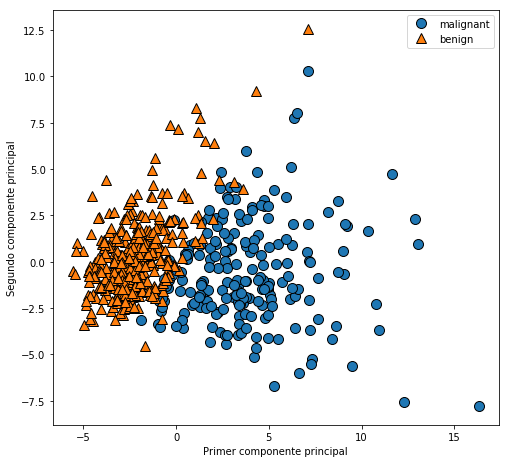

In [8]:
plt.figure(figsize=(8, 8))
dibuja_dispersion_discreta(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("Primer componente principal")
plt.ylabel("Segundo componente principal")

Es importante tener en cuenta que PCA es un método no supervisado  y no utiliza ninguna información de clase al encontrar la rotación. Simplemente mira las correlaciones en los datos.

Una desventaja de PCA es que los dos ejes en el gráfico a menudo no son muy fáciles de interpretar. Los componentes principales corresponden a las direcciones en los datos originales, por lo que son combinaciones de las características originales. Sin embargo, estas combinaciones suelen ser muy complejas. Los componentes principales se almacenan en el atributo `components_` del objeto PCA durante el ajuste:

In [9]:
print("Dimension de componentes PCA: {}".format(pca.components_.shape))

Dimension de componentes PCA: (2, 30)


Cada fila en `components_` corresponde a un componente principal y se ordenan por su importancia (el primer componente principal es el primero, etc.). Las columnas corresponden al atributo de características originales del PCA en este ejemplo `mean radius`, `mean texture` y así sucesivamente. Echemos un vistazo al contenido de los `components_`:


In [10]:
print("Componentes PCA:\n{}".format(pca.components_))


Componentes PCA:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


También podemos visualizar los coeficientes usando un mapa de calor que podría ser más fácil de entender:

Text(0,0.5,'Componentes principales')

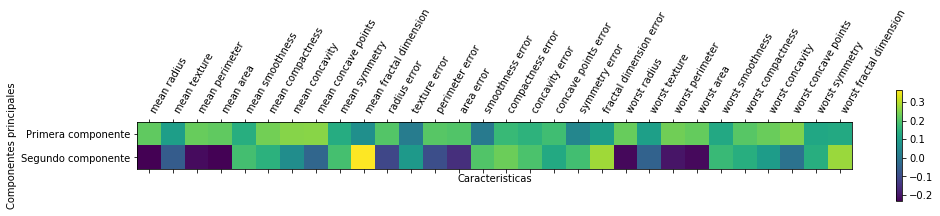

In [11]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["Primera componente", "Segundo componente"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Caracteristicas")
plt.ylabel("Componentes principales")

Se puede ver que en el primer componente, todas las características tienen el mismo signo (es negativo, pero como mencionamos anteriormente, no importa en qué dirección apunte la flecha). Eso significa que hay una correlación general entre todas las características. Como una medición es alta, es probable que las otras también sean altas. El segundo componente tiene signos mixtos y ambos componentes incluyen todas las `30` características. Esta mezcla de todas las características es lo que hace que explicar los ejes de la figura anterior sea tan complicado.

### Eigenfaces para la extracción de características

Una aplicación del PCA  es la extracción de características. La idea detrás de la extracción de características es que es posible encontrar una representación de los datos que sea más adecuada para el análisis. Un  ejemplo de aplicación donde la extracción de características es útil es con imágenes. Las imágenes están compuestas de píxeles, generalmente almacenadas en rojo, verde y azul (RGB). Los objetos en las imágenes generalmente están formados por miles de píxeles y solo juntos son significativos.

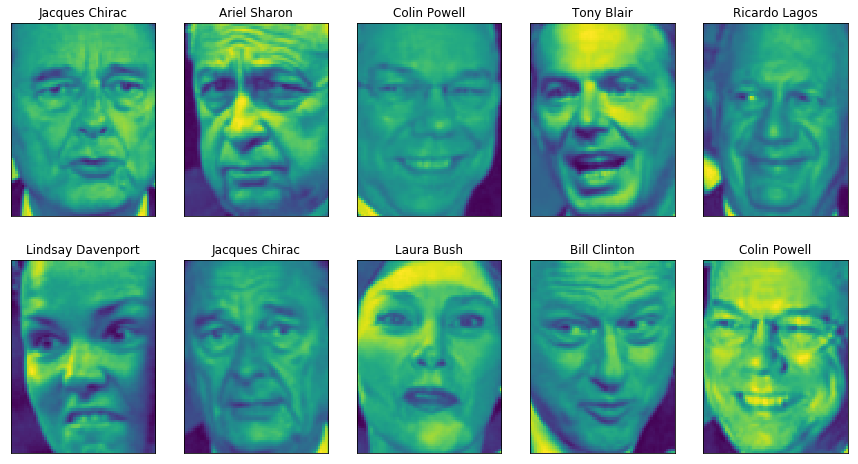

In [18]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_lfw_people

personas= fetch_lfw_people(min_faces_per_person=20, resize=0.7)
imagen_shape = personas.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for objetivo, imagen, ax in zip(personas.target, personas.images, axes.ravel()):
    ax.imshow(imagen)
    ax.set_title(personas.target_names[objetivo])

In [19]:
print("Dimension de la imagenes de las personas: {}".format(personas.images.shape))
print("Numero de clases: {}".format(len(personas.target_names)))

Dimension de la imagenes de las personas: (2537, 87, 65)
Numero de clases: 45


Contamos con qué frecuencia aparece cada objetivo de `Labeled Faces` en el conjunto de datos `Wild`.

In [20]:
conteos = np.bincount(personas.target)
for i, (conteo, nombre) in enumerate(zip(conteos, personas.target_names)):
    print("{0:25} {1:3}".format(nombre, conteo), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Ariel Sharon               77 Atal Bihari Vajpayee       24 
Bill Clinton               29 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Hamid Karzai               22 Hans Blix                  39 Hugo Chavez                71 
Igor Ivanov                20 Jack Straw                 28 Jacques Chirac             52 
Jean Chretien              55 Jennifer Aniston           21 Jennifer Capriati          42 
Jennifer Lopez             21 John Ashcroft              53 Juan Carlos Ferrero        28 
Junichiro Koizumi          60 Kofi Annan                 32 Laura Bush                 41 
Lindsay Davenport          22 Lleyton Hewitt             41 Megawati Sukarnoputri      33 

Para que los datos sean menos sesgados, solo tomaremos hasta 50 imágenes de cada persona (de lo contrario, la extracción de características se vería abrumada por la probabilidad de que George W. Bush):

In [22]:
mascara = np.zeros(personas.target.shape, dtype=np.bool)
for objetivo in np.unique(personas.target):
    mascara[np.where(personas.target == objetivo)[0][:50]] = 1

X_personas = personas.data[mascara]
y_personas = personas.target[mascara]

# la escala debe ir entre 0 y 1 en lugar de  0 y 255 
# para menor estabilidad numerica
X_personas = X_personas / 255.

Una tarea común en el reconocimiento facial es preguntar si una cara que no se ha visto anteriormente pertenece a una persona conocida de una base de datos además de agregar nuevas personas fácilmente sin reetrenar un modelo . Esta tarea  tiene aplicaciones en colecciones de fotos, redes sociales y aplicaciones de seguridad. 

Una forma de resolver este problema sería construir un clasificador donde cada persona sea una clase separada. Sin embargo, generalmente hay muchas personas diferentes en las bases de datos de caras y muy pocas imágenes de la misma persona (es decir muy pocos ejemplos de entrenamiento por clase).

Una solución simple es usar un clasificador de un vecino más cercano que busque la imagen de un rostro más similar a la cara que está clasificando. Este clasificador podría, en principio, funcionar con un solo ejemplo de entrenamiento por clase. Vemos que sucede con  un KNeighborsClassifier aquí:

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X_personas, y_personas, stratify=y_personas, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_entrenamiento, y_entrenamiento)
print("Puntuacion de conjunto de pruebas 1-nn: {:.2f}".format(knn.score(X_prueba, y_prueba)))

Puntuacion de conjunto de pruebas 1-nn: 0.28


Obtenemos una precisión del 28%, que en realidad no es tan mala para un problema de clasificación de 62 clases (las predicciones al azar le darían alrededor de 1/62 = 1.5% de precisión), pero tampoco es excelente. Solo identificamos correctamente a una persona de cada cuatro veces.

Aquí es donde entra PCA. Calcular las distancias en el espacio de píxeles es una manera bastante mala de medir la similitud entre las caras. Al usar una representación de píxeles para comparar dos imágenes, comparamos el valor de escala de grises de cada píxel individual con el valor del píxel en la posición correspondiente en la otra imagen. Esta representación es bastante diferente de cómo los humanos interpretarían la imagen de una cara  y es difícil capturar las características faciales usando esta representación. Por ejemplo, usar distancias de píxeles significa que desplazar una cara por un píxel hacia la derecha corresponde a un cambio drástico, con una representación completamente diferente. 

Se espera que el uso de distancias a lo largo de los componentes principales pueda mejorar nuestra precisión.

Aquí, habilitamos la opción `whitening` de PCA, que vuelve a escalar los componentes principales para tener la misma escala. Esto es lo mismo que usar StandardScaler después de la transformación.


In [25]:
def dibuja_pca_whitening():
    rnd = np.random.RandomState(5)
    X_ = rnd.normal(size=(300, 2))
    X_s = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

    pca = PCA(whiten=True)
    pca.fit(X_s)
    X_pca = pca.transform(X_s)

    fig, axes = plt.subplots(1, 2, figsize=(10, 10))
    axes = axes.ravel()

    axes[0].set_title("Datos originales")
    axes[0].scatter(X_s[:, 0], X_s[:, 1], c=X_pca[:, 0], linewidths=0, s=60, cmap='viridis')
    axes[0].set_xlabel("Caracteristica 1")
    axes[0].set_ylabel("Caracteristica 2")
    axes[0].set_aspect('equal')

    axes[1].set_title("Data whitened ")
    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0, s=60, cmap='viridis')
    axes[1].set_xlabel("Primer componente principal")
    axes[1].set_ylabel("Segundo componente principal")
    axes[1].set_aspect('equal')
    axes[1].set_xlim(-3, 4)

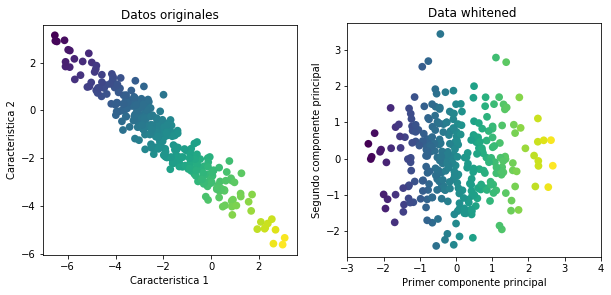

In [26]:
dibuja_pca_whitening()

Ajustamos el objeto PCA a los datos de entrenamiento y extraemos los primeros 100 componentes principales. Luego transformamos los datos de entrenamiento y prueba:

In [28]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_entrenamiento)
X_entrenamiento_pca = pca.transform(X_entrenamiento)
X_prueba_pca = pca.transform(X_prueba)
print("Dimension del conjunto de entrenamiento PCA: {}".format(X_entrenamiento_pca.shape))

Dimension del conjunto de entrenamiento PCA: (1182, 100)


Los nuevos datos tienen 100 características, los primeros 100 componentes principales. Ahora, podemos usar la nueva representación para clasificar las imágenes usando un clasificador de vecinos más cercanos:

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_entrenamiento_pca, y_entrenamiento)
print("Precision del conjunto de prueba: {:.2f}".format(knn.score(X_prueba_pca, y_prueba)))

Precision del conjunto de prueba: 0.34


Veamos los primeros dos componentes principales:

In [30]:
print("Dimension del pca.components_: {}".format(pca.components_.shape))

Dimension del pca.components_: (100, 5655)


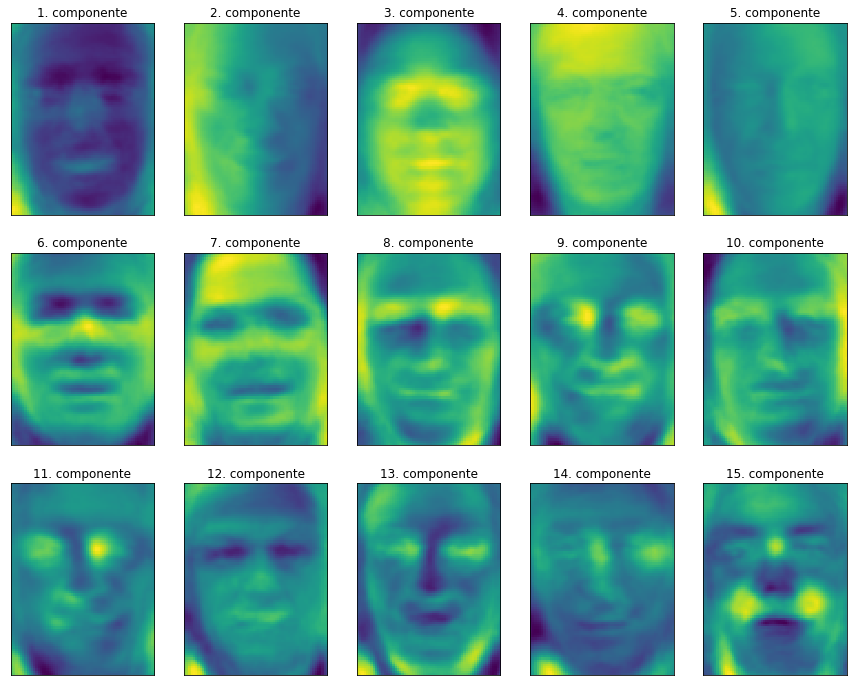

In [32]:
# Vectores de componentes de los primeros 15 componentes principales del conjunto de datos de rostros
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (componente, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(componente.reshape(imagen_shape),cmap='viridis')
    ax.set_title("{}. componente".format((i + 1)))

Si bien esta representación es un poco más semántica que los valores iniciales de los píxeles, todavía está bastante lejos de cómo un ser humano podría percibir una cara. Como el modelo de PCA se basa en píxeles, la alineación de la cara (la posición de los ojos, el mentón y la nariz) y la iluminación tienen una gran influencia en la similitud de dos imágenes en su representación de píxeles. Pero la alineación y la iluminación probablemente no sean lo que un humano percibiría primero.

Al pedirle a las personas que califiquen la similitud de las caras, es más probable que usen atributos como edad, sexo, expresión facial y estilo de pelo, atributos que son difíciles de inferir a partir de las intensidades de los píxeles. Es importante tener en cuenta que los algoritmos a menudo interpretan los datos (en particular, los datos visuales, como las imágenes, con las que los humanos están muy familiarizados) de forma bastante diferente a como lo haría un ser humano.

En el  caso específico de PCA. Se presentamos la transformación de PCA como la rotación de los datos y luego descartar los componentes con baja varianza. Otra interpretación útil es tratar de encontrar algunos números (los nuevos valores de características después de la rotación de PCA) para que podamos expresar los puntos de prueba como una suma ponderada de los componentes principales.

![](Grafico3.png)


En el gráfico se muestra al PCA como la descomposición de una imagen en una suma ponderada de componentes. Aquí, $x_0$, $x_1,$ etc. son los coeficientes de los componentes principales para este punto de datos; en otras palabras, son la representación de la imagen en el espacio girado.

Otra forma en que podemos tratar de entender lo que está haciendo un modelo de PCA es mirando las reconstrucciones de los datos originales usando solo algunos componentes. Podemos hacer una transformación para las caras reduciendo los datos a solo algunos componentes principales y luego volviendo al espacio original. Este retorno al espacio de características original se puede hacer utilizando el método de `inverse_transform`.

In [39]:
@memory.cache

def pca_caras(X_entrenamiento, X_prueba):
    imagenes_reducidas = []
    for n_componentes in [10, 50, 100, 500]:
        pca = PCA(n_components=n_componentes)
        pca.fit(X_entrenamiento)
        # transformaciones de pruebas
        X_prueba_pca = pca.transform(X_prueba)
        # volvemos  a transformar los datos de prueba transformados
        X_prueba_1 = pca.inverse_transform(X_prueba_pca)
        imagenes_reducidas.append(X_prueba_1)
    return imagenes_reducidas


def dibuja_pca_caras(X_entrenamiento, X_prueba, imagen_shape):
    imagenes_reducidas = pca_caras(X_entrenamiento, X_prueba)

    # dibujamos  las primeras tres imágenes en el conjunto de prueba:
    fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for i, ax in enumerate(axes):
        # dibujamos la imagen original
        ax[0].imshow(X_prueba[i].reshape(imagen_shape),
                     vmin=0, vmax=1)
        # dibujamos las cuatro imágenes transformadas 
        for a, X_prueba_1  in zip(ax[1:], imagenes_reducidas):
            a.imshow(X_prueba_1[i].reshape(imagen_shape), vmin=0, vmax=1)

    # etiqueta  la fila superior
    axes[0, 0].set_title("Imagen original")
    for ax, n_componentes in zip(axes[0, 1:], [10, 50, 100, 500]):
        ax.set_title("%d componentes" % n_componentes)

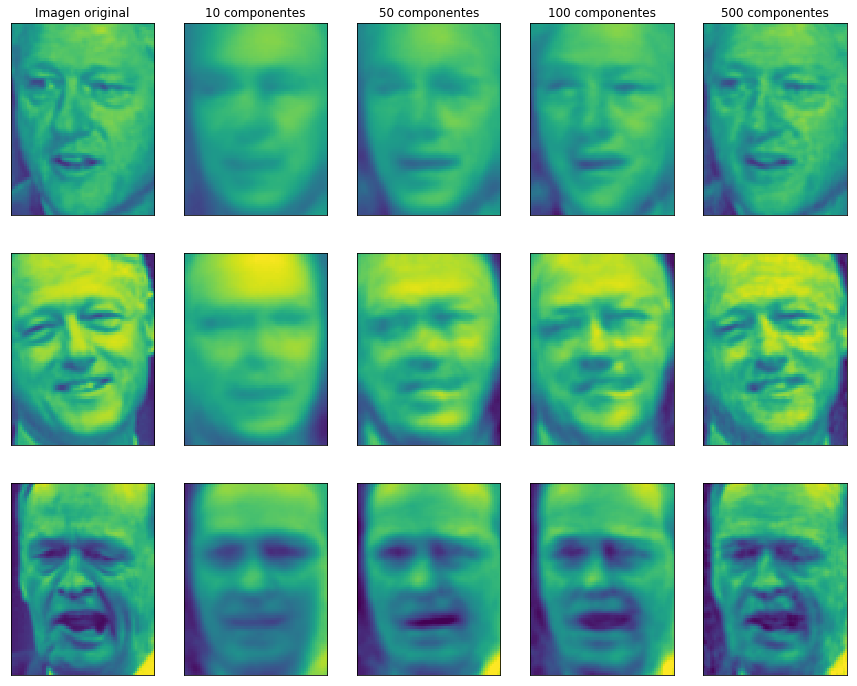

In [40]:
dibuja_pca_caras(X_entrenamiento, X_prueba, imagen_shape)

Puede ver que cuando usamos solo los primeros 10 componentes principales, solo se captura la esencia de la imagen, como la orientación de la cara y la iluminación. Al usar más y más componentes principales, se conservan más y más detalles en la imagen. Usar tantos componentes como pixeles significaría que no descartaríamos ninguna información después de la rotación, y reconstruiríamos la imagen perfectamente.

También podemos intentar usar PCA para visualizar todas las caras en el conjunto de datos en un diagrama de dispersión utilizando los dos primeros componentes principales con las clases dadas por quién se muestra en la imagen.

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import  colorConverter

def dibuja_dispersion_discreta(x1, x2, y=None, marcadores=None, s=10, ax=None,
                     etiquetas=None, relleno=.2, alfa=1, c=None, anchobordemarcador=None):
    """Adaptacion de la funcion matplotlib.pyplot.scatter a dibujar clases o  clusters"""
    
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unico_y = np.unique(y)

    if marcadores is None:
        marcadores= ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(marcadores) == 1:
        marcadores = marcadores * len(unico_y)

    if etiquetas is None:
        etiquetas = unico_y

    # lineas en el sentido de matplotlib
    lineas = []

    actual_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unico_y, actual_cycler())):
        mascara = y == yy
        # if c is ninguno, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # bordes claros para marcadores oscuros
        if np.mean(colorConverter.to_rgb(color)) < .4:
            colorbordemarcador = "grey"
        else:
            colorbordemarcador = "black"

        lineas.append(ax.plot(x1[mascara], x2[mascara], marcadores[i], markersize=s,
                             label=etiquetas[i], alpha=alfa, c=color,
                             markeredgewidth=anchobordemarcador,
                             markeredgecolor=colorbordemarcador)[0])

    if relleno != 0:
        pad1 = x1.std() * relleno
        pad2 = x2.std() * relleno
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lineas

Text(0,0.5,'Segundo componente principal')

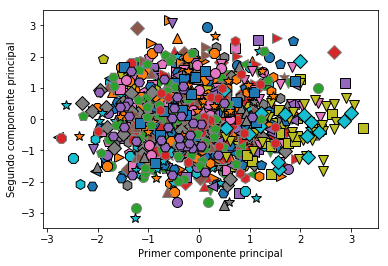

In [42]:
dibuja_dispersion_discreta(X_entrenamiento_pca[:, 0], X_entrenamiento_pca[:, 1], y_entrenamiento)
plt.xlabel("Primer componente principal")
plt.ylabel("Segundo componente principal")

Como puede ver, cuando utilizamos solo los dos primeros componentes principales, toda la información es solo un conglomerado, sin separación de clases visible. Esto no es muy sorprendente, dado que incluso con 10 componentes, PCA solo captura características muy complicadas de las caras.